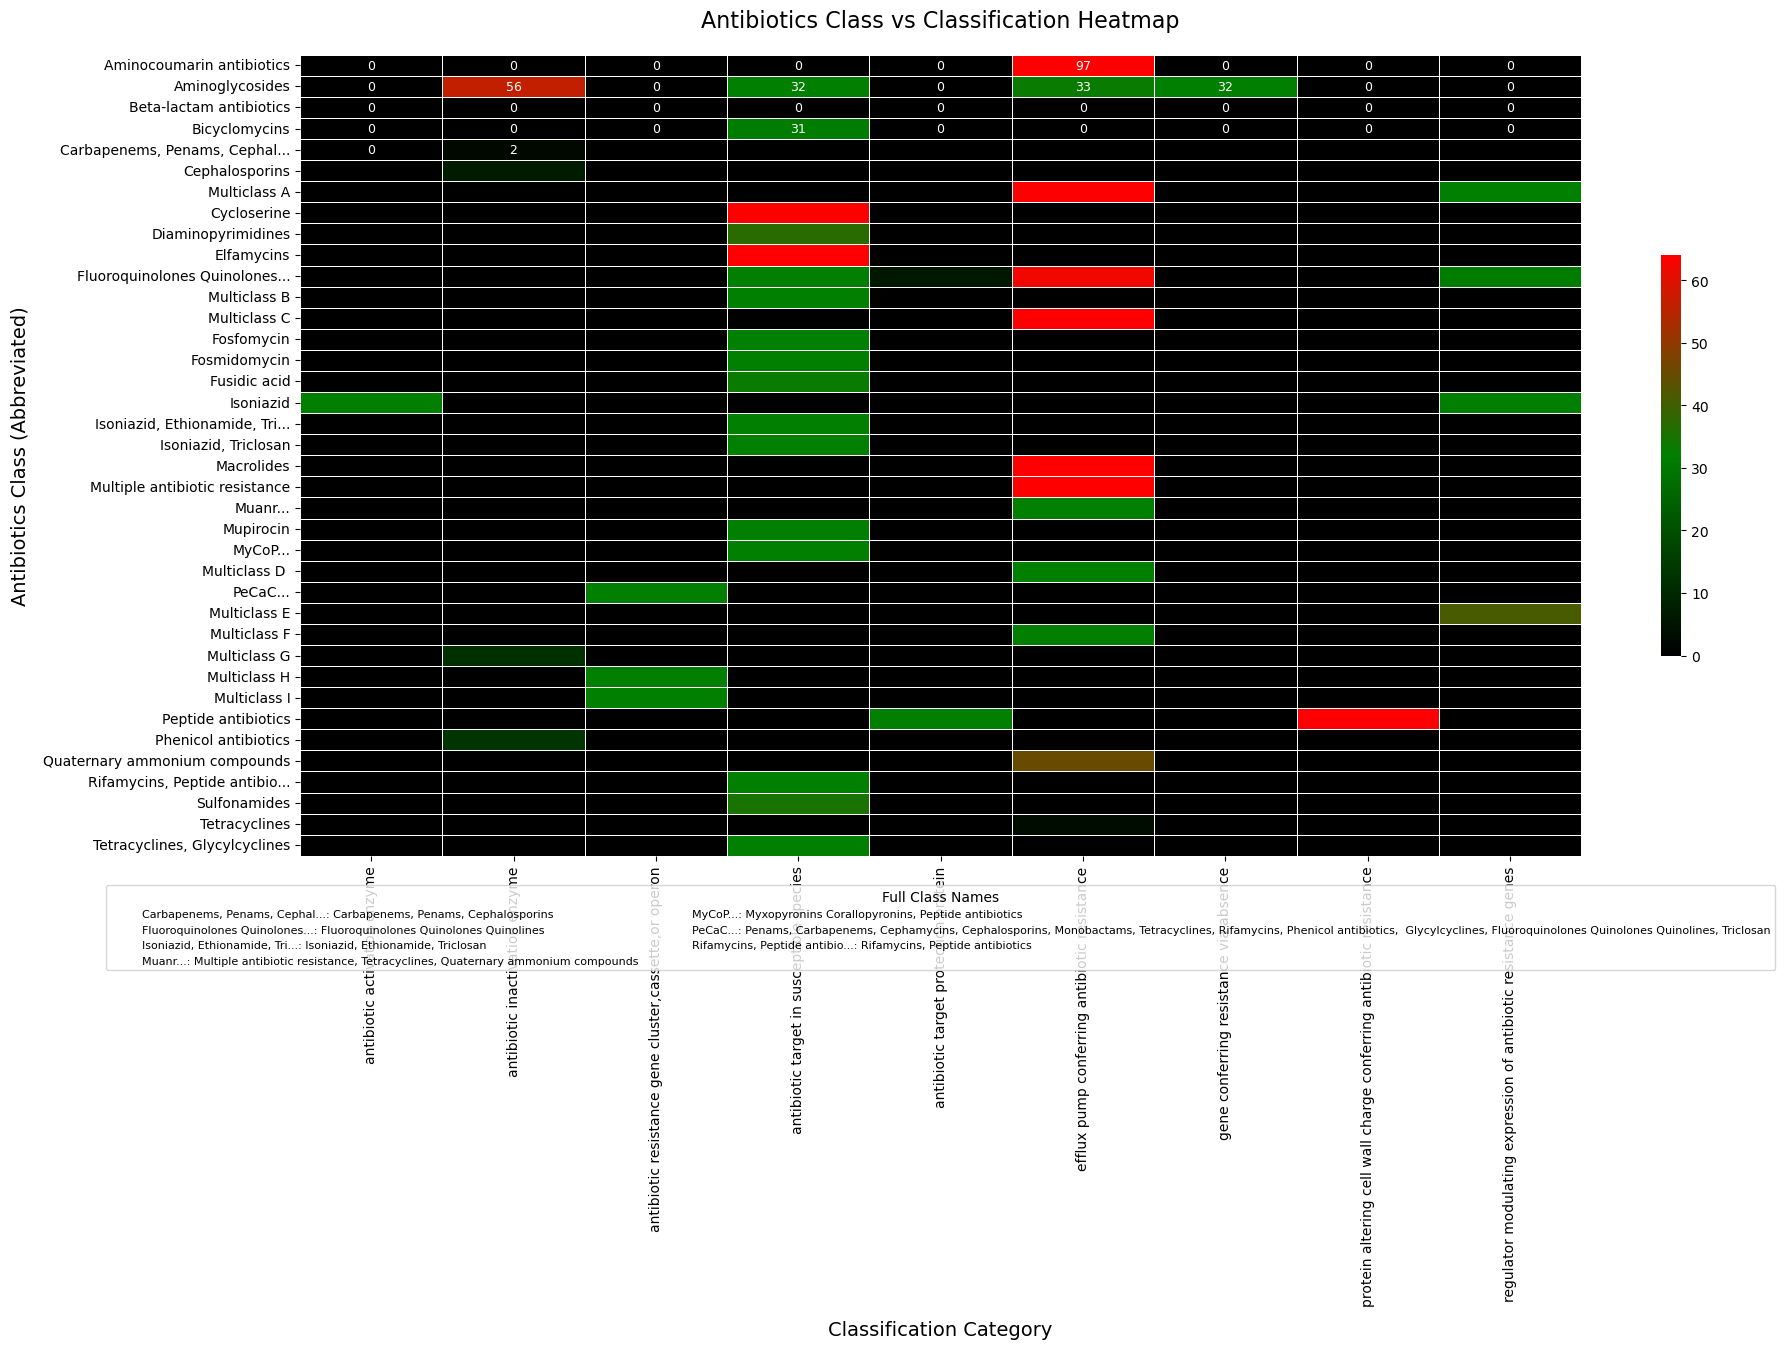

Abbreviation reference table saved to: antibiotics_class_abbreviations.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patches import Patch

# Define direct path to file
input_file = "datasets/Antibiotics Class-Classification.csv"
output_heatmap = "Antibiotics_Class-Classification_heatmap.png"
output_matrix_csv = "Antibiotics_Matrix_Data.csv"

# Data acquisition and validation
if not os.path.exists(input_file):
    possible_alternatives = [
        "datasets/Antibiotics ClassClassification.csv",
        "datasets/Antibiotics_Class-Classification.csv"
    ]
    for alt_path in possible_alternatives:
        if os.path.exists(alt_path):
            input_file = alt_path
            print(f"Using alternative path: {input_file}")
            break
    else:
        raise FileNotFoundError("Required dataset not located in specified directory structure.")

# Data preprocessing
data = pd.read_csv(input_file)
if data.iloc[0, 0] == 'Antibiotics Class':
    new_headers = data.iloc[0, :].tolist()
    data.columns = new_headers
    data = data.iloc[1:, :].reset_index(drop=True)

# Index configuration
if 'Antibiotics Class' in data.columns:
    data = data.set_index('Antibiotics Class')
elif data.columns[0] == '' or 'Unnamed: 0' in data.columns:
    first_col = data.columns[0]
    data = data.rename(columns={first_col: 'Antibiotics Class'})
    data = data.set_index('Antibiotics Class')

# Data type standardization
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.fillna(0).astype(int)

# Matrix persistence
data.to_csv(output_matrix_csv)

# CRITICAL: Label abbreviation implementation
# Create mapping between full names and abbreviated versions
label_map = {}
abbreviations = []

for idx, full_name in enumerate(data.index):
    # Method 1: Simple truncation with ellipsis
    if len(full_name) > 30:
        abbrev = full_name[:27] + "..."
    else:
        abbrev = full_name
    
    # Method 2: Intelligent abbreviation (for multi-word class names)
    words = full_name.split()
    if len(words) > 3:
        # Create abbreviation from first letters or first two characters of each word
        intelligent_abbrev = "".join([word[:2] for word in words if len(word) > 2])
        if len(intelligent_abbrev) > 5:  # If still too long
            abbrev = intelligent_abbrev[:5] + "..."
    
    # Ensure uniqueness of abbreviations
    base_abbrev = abbrev
    suffix = 1
    while abbrev in abbreviations:
        abbrev = f"{base_abbrev}_{suffix}"
        suffix += 1
    
    abbreviations.append(abbrev)
    label_map[abbrev] = full_name

# Create a copy of the dataframe with abbreviated labels
data_abbrev = data.copy()
data_abbrev.index = abbreviations

# Figure initialization with optimized dimensions
fig_width = max(20, data.shape[1] * 2.0)
fig_height = max(16, data.shape[0] * 0.4)

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Color palette definition with scientific rationale
cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
    "custom", ["black", "green", "red"], N=256
)

# Primary visualization
heatmap = sns.heatmap(
    data_abbrev,
    cmap=cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='g',
    annot_kws={"size": 9},
    center=None,
    robust=True,
    cbar_kws={"shrink": 0.5},
    ax=ax
)

# Typography configuration
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

# Advanced layout management
plt.subplots_adjust(left=0.2, right=0.85, bottom=0.35, top=0.95)

# Annotation and contextual elements
plt.title("Antibiotics Class vs Classification Heatmap", fontsize=16, pad=20)
plt.xlabel('Classification Category', fontsize=14, labelpad=10)
plt.ylabel('Antibiotics Class (Abbreviated)', fontsize=14, labelpad=10)

# CRITICAL: Legend implementation for full class names
# Calculate optimal legend positioning
legend_elements = []
legend_entries = []

for abbrev, full_name in label_map.items():
    if abbrev != full_name:  # Only include abbreviated entries
        legend_elements.append(Patch(facecolor='white', edgecolor='gray', alpha=0.0))
        legend_entries.append(f"{abbrev}: {full_name}")

# Create separate figure for legend if many entries
if len(legend_entries) > 15:
    # Create a separate legend figure
    legend_fig = plt.figure(figsize=(12, len(legend_entries) * 0.25))
    legend_ax = legend_fig.add_subplot(111)
    legend_ax.axis('off')
    
    # Split legend into multiple columns if needed
    ncol = max(1, min(3, len(legend_entries) // 20 + 1))
    legend = legend_ax.legend(legend_elements, legend_entries, 
                             loc='center', frameon=True, fontsize=8, 
                             title="Full Class Names", ncol=ncol)
    legend_fig.tight_layout()
    legend_path = output_heatmap.replace('.png', '_legend.png')
    legend_fig.savefig(legend_path, dpi=150, bbox_inches='tight')
    print(f"Legend saved separately to: {legend_path}")
    
    # Add note to main figure
    plt.figtext(0.5, 0.02, "Note: See accompanying legend file for full class names", 
                ha="center", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})
else:
    # Add legend to main figure if few entries
    leg = ax.legend(legend_elements, legend_entries, 
                   loc='lower center', bbox_to_anchor=(0.5, -0.15),
                   frameon=True, fontsize=8, title="Full Class Names", ncol=2)

# Save visualization with comprehensive metadata
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig(output_heatmap, dpi=150, bbox_inches='tight', pad_inches=0.5)
plt.show()

# Generate table of abbreviations for reference
abbrev_df = pd.DataFrame({
    'Abbreviation': abbreviations,
    'Full Class Name': data.index
})
abbrev_df.to_csv('antibiotics_class_abbreviations.csv', index=False)
print("Abbreviation reference table saved to: antibiotics_class_abbreviations.csv")

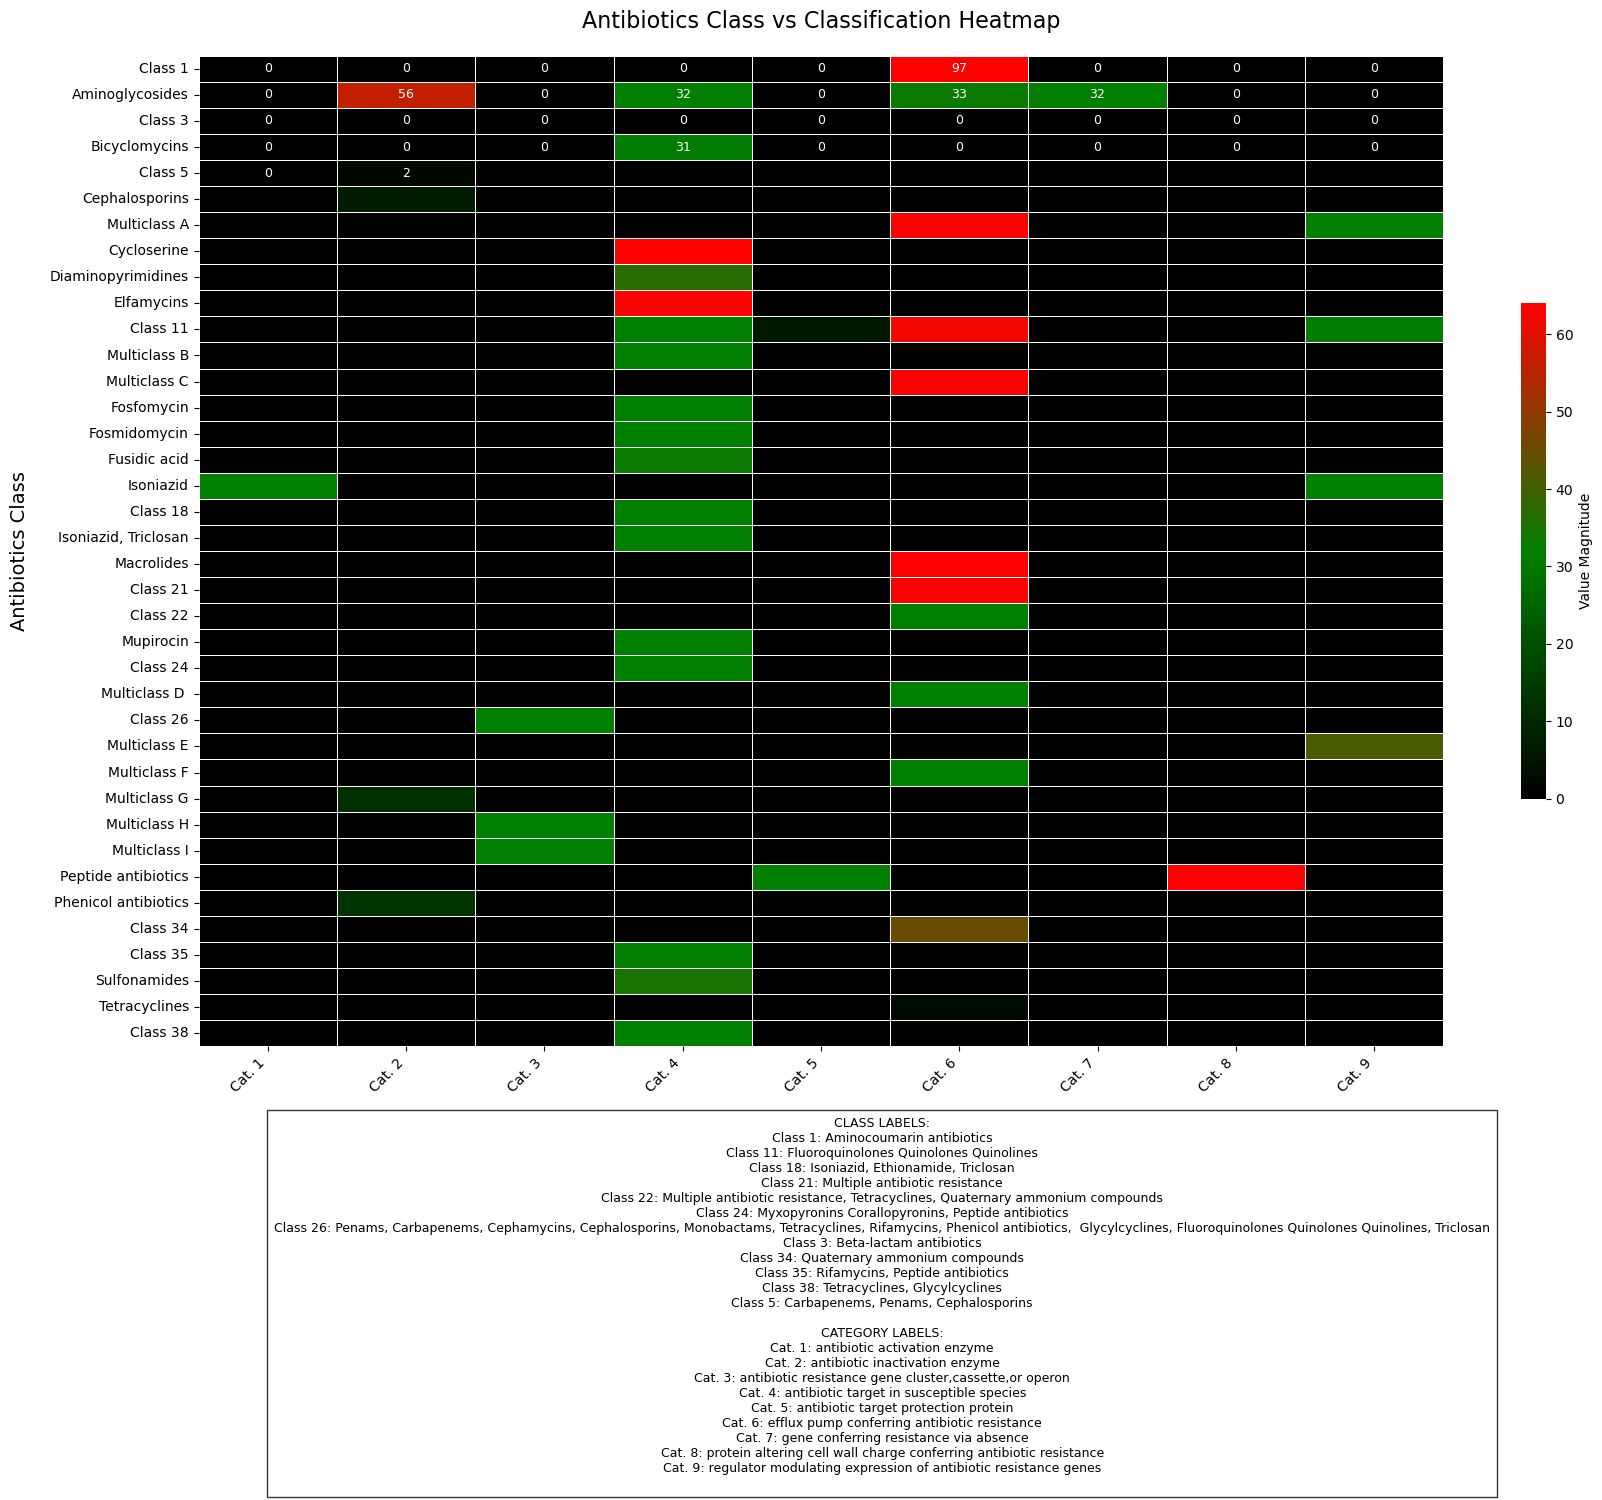

Label reference file generated: class_label_reference.txt


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import MaxNLocator

# Define file paths
input_file = "datasets/Antibiotics Class-Classification.csv"
output_heatmap = "Antibiotics_Class-Classification_heatmap.png"
output_matrix_csv = "Antibiotics_Matrix_Data.csv"

# File verification with alternative path detection
if not os.path.exists(input_file):
    possible_alternatives = [
        "datasets/Antibiotics ClassClassification.csv",
        "datasets/Antibiotics_Class-Classification.csv",
        "datasets/Antibiotics Class Classification.csv"
    ]
    
    for alt_path in possible_alternatives:
        if os.path.exists(alt_path):
            input_file = alt_path
            print(f"Located alternative file path: {input_file}")
            break
    else:
        raise FileNotFoundError(f"Unable to locate target file in datasets directory.")

# Data acquisition and preprocessing
data = pd.read_csv(input_file)

# Header structure processing
if data.iloc[0, 0] == 'Antibiotics Class':
    new_headers = data.iloc[0, :].tolist()
    data.columns = new_headers
    data = data.iloc[1:, :].reset_index(drop=True)

# Index configuration
if 'Antibiotics Class' in data.columns:
    data = data.set_index('Antibiotics Class')
elif data.columns[0] == '':
    data = data.rename(columns={data.columns[0]: 'Antibiotics Class'})
    data = data.set_index('Antibiotics Class')
elif 'Unnamed: 0' in data.columns:
    data = data.rename(columns={'Unnamed: 0': 'Antibiotics Class'})
    data = data.set_index('Antibiotics Class')

# Type conversion and null handling
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.fillna(0).astype(int)

# Matrix data export
data.to_csv(output_matrix_csv)

# CRITICAL IMPLEMENTATION: Label truncation with mapping preservation
# Create a mapping dictionary for original to shortened names
row_label_mapping = {}
for idx, label in enumerate(data.index):
    if len(str(label)) > 20:  # Threshold for truncation
        shortened = f"Class {idx+1}"  # Numeric identifier
        row_label_mapping[shortened] = str(label)
        data.rename(index={label: shortened}, inplace=True)

column_label_mapping = {}
for idx, col in enumerate(data.columns):
    if len(str(col)) > 15:  # Column truncation threshold
        shortened = f"Cat. {idx+1}"  # Categorical identifier
        column_label_mapping[shortened] = str(col)
        data.rename(columns={col: shortened}, inplace=True)

# Figure dimensioning with optimization for truncated labels
fig_width = max(18, data.shape[1] * 1.8)
fig_height = max(12, data.shape[0] * 0.4)

# Figure initialization with optimized dimensions
plt.figure(figsize=(fig_width, fig_height))

# Custom color gradient specification
cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
    "custom", ["black", "green", "red"], N=256
)

# Heatmap generation with enhanced visual parameters
heatmap = sns.heatmap(
    data,
    cmap=cmap,
    cbar=True,
    square=False,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='g',
    annot_kws={"size": 9},
    robust=True,
    cbar_kws={"shrink": 0.5, "label": "Value Magnitude"}
)

# Typography configuration
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Title positioning with adequate clearance
plt.title("Antibiotics Class vs Classification Heatmap", fontsize=16, pad=20)

# Axis labeling with optimized positioning
# plt.xlabel('Classification Category', fontsize=14, labelpad=15)
plt.ylabel('Antibiotics Class', fontsize=14, labelpad=15)

# Layout optimization
plt.tight_layout(pad=2.0)

# SUPPLEMENTARY LEGEND: Add mapping information as separate text box
if row_label_mapping or column_label_mapping:
    legend_text = "CLASS LABELS:\n"
    for short, full in sorted(row_label_mapping.items()):
        legend_text += f"{short}: {full}\n"
    
    if column_label_mapping:
        legend_text += "\nCATEGORY LABELS:\n"
        for short, full in sorted(column_label_mapping.items()):
            legend_text += f"{short}: {full}\n"
    
    # Position legend at bottom of figure with adequate spacing
    plt.figtext(0.5, 0.01, legend_text, ha='center', fontsize=9, 
                bbox={"facecolor":"white", "alpha":0.8, "pad":5})
    
    # Adjust bottom margin to accommodate legend
    plt.subplots_adjust(bottom=0.3)

# Output generation with high resolution preservation
plt.savefig(output_heatmap, dpi=150, bbox_inches='tight', pad_inches=0.5)

# Visualization display
plt.show()

# Generate auxiliary legend file for reference
if row_label_mapping or column_label_mapping:
    with open('class_label_reference.txt', 'w') as f:
        f.write("ANTIBIOTICS CLASSIFICATION LABEL REFERENCE\n")
        f.write("=========================================\n\n")
        if row_label_mapping:
            f.write("CLASS LABELS:\n")
            for short, full in sorted(row_label_mapping.items()):
                f.write(f"{short}: {full}\n")
        if column_label_mapping:
            f.write("\nCATEGORY LABELS:\n")
            for short, full in sorted(column_label_mapping.items()):
                f.write(f"{short}: {full}\n")
    print("Label reference file generated: class_label_reference.txt")